In [1]:
### Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### DataSet
Get Dataset from here [DATASET](https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)

### About Dataset
The dataset provides patient reviews on specific drugs along with related conditions and a 10 star patient rating reflecting overall patient satisfaction. The data was obtained by crawling online pharmaceutical review sites. The intention was to study.

### About Attributes

1. drugName (categorical): name of drug
2. condition (categorical): name of condition
3. review (text): patient review
4. rating (numerical): 10 star patient rating
5. date (date): date of review entry
6. usefulCount (numerical): number of users who found review useful

In [2]:
drugs_df = pd.read_csv('../Dataset/drugsCom_raw/drugsComTrain_raw.tsv',sep='\t')

In [3]:
drugs_df.shape

(161297, 7)

In [4]:
drugs_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
drugs_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   161297 non-null  int64  
 1   drugName     161297 non-null  object 
 2   condition    160398 non-null  object 
 3   review       161297 non-null  object 
 4   rating       161297 non-null  float64
 5   date         161297 non-null  object 
 6   usefulCount  161297 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 115.7 MB


## Data Types
**From 115.7 MB to 3.9 MB**
   
+ Delete `Unnamed: 0` Column.
+ Change the `drugName` from object to category.
+ Change the `condition` from object to category.
+ chage the data type of `review` and `usefulCount` from `float64` to 'int16'
+ change the data type of `date` to date.

In [31]:
df = (drugs_df
    .drop('Unnamed: 0', axis=1)
    .assign(
            **{c:lambda df_, c=c:df_[c].astype('category') for c in ['drugName', 'condition']},
            **{c:lambda df_,c=c: df_[c].astype('int16') for c in ['rating','usefulCount']},
            date = pd.to_datetime(drugs_df['date'])
    )
)

In [7]:
df.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37


#### Check for null values.

In [8]:
df.isnull().sum()

drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

**Note**: We have 899 null values in `condition`.

    - Patient not have related condition.

## Questions

### 1. How many drugs we have.

In [9]:
# print(df['drugName'].unique().tolist())
len(df['drugName'].unique().tolist())

3436

### 2. What is the most Popular drug.

In [10]:
df['drugName'].value_counts().nlargest(1)

Levonorgestrel    3657
Name: drugName, dtype: int64

### 3. Get Top 10 Drugs and Plot with bar

In [11]:
df['drugName'].value_counts().nlargest(10)

Levonorgestrel                        3657
Etonogestrel                          3336
Ethinyl estradiol / norethindrone     2850
Nexplanon                             2156
Ethinyl estradiol / norgestimate      2117
Ethinyl estradiol / levonorgestrel    1888
Phentermine                           1543
Sertraline                            1360
Escitalopram                          1292
Mirena                                1242
Name: drugName, dtype: int64

Text(0, 0.5, 'Count')

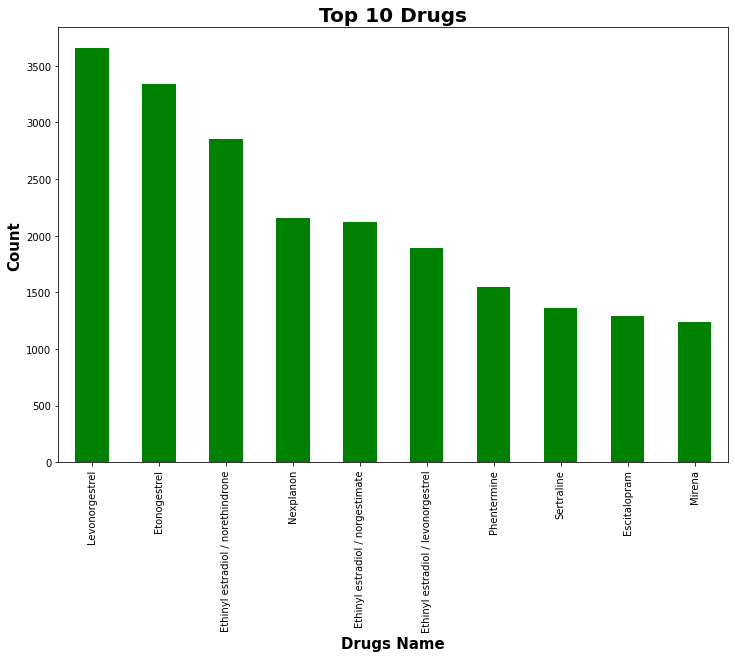

In [12]:
plt.figure(figsize=(12,8))
fig = df['drugName'].value_counts().nlargest(10).plot(kind='bar',color='green')
fig.set_title("Top 10 Drugs", {'fontsize': 20,'fontweight': 'bold'})
fig.set_xlabel("Drugs Name",{'fontsize': 15,'fontweight': 'bold'})
fig.set_ylabel("Count", {'fontsize': 15,'fontweight': 'bold'})

### 3. Get least 10 Drugs and Plot with bar

In [13]:
df['drugName'].value_counts().nsmallest(10)

Afrin NoDrip Sinus                 1
Cetaphil Lotion                    1
Zetran                             1
Aleve-D Sinus & Cold               1
Alclometasone                      1
Afrin 4 Hour Extra Moisturizing    1
Cortisone                          1
Cerezyme                           1
Zicam Extreme Congestion Relief    1
SymlinPen 60                       1
Name: drugName, dtype: int64

Text(0, 0.5, 'Count')

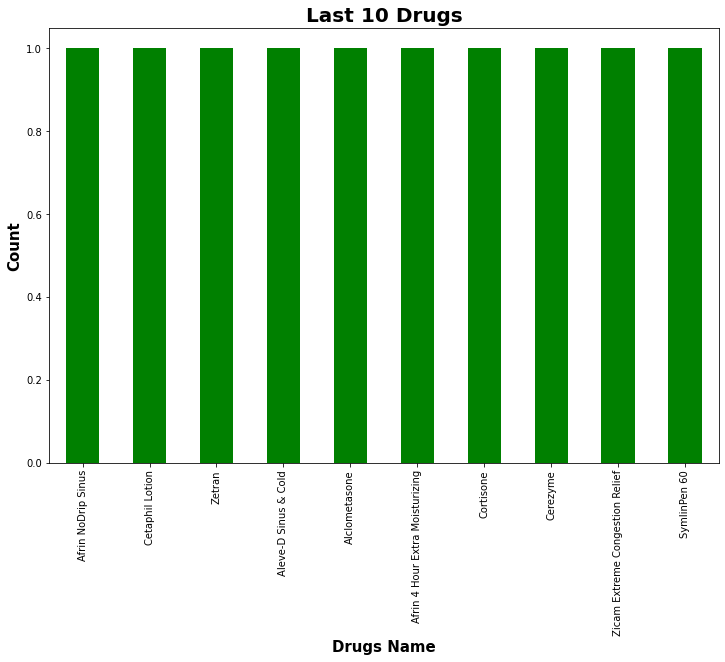

In [14]:
plt.figure(figsize=(12,8))
fig = df['drugName'].value_counts().nsmallest(10).plot(kind='bar',color='green')
fig.set_title("Last 10 Drugs", {'fontsize': 20,'fontweight': 'bold'})
fig.set_xlabel("Drugs Name",{'fontsize': 15,'fontweight': 'bold'})
fig.set_ylabel("Count", {'fontsize': 15,'fontweight': 'bold'})

### 4. What are the classification of drugs.

In [15]:
drug_suffix = {"azole":"antifungal (except metronidazole)",
"caine":"anesthetic",
"cillin":"antibiotic(penicillins)",
"mycin":"antibiotic",
"micin":"antibiotic",
"cycline":"antibiotic",
"oxacin":"antibiotic",
"ceph":"antibiotic(cephalosporins)",
"cef":"antibiotic (cephalosporins)",
"dine":"h2 blockers (anti-ulcers)",
"done":"opiod analgesics",
"ide":"oral hypoglycemics",
"lam":"anti-anxiety",
"pam":"anti-anxiety",
"mide":"diuretics",
"zide":"diuretics",
"nium":"neuromuscular blocking agents",
"olol":"beta blockers",
"tidine":"h2 antagonist",
"tropin":"pituitary hormone",
"zosin":"alpha blocker",
"ase":"thrombolytics",
"plase":"thrombolytics",
"azepam":"anti-anziety(benzodiazepine)",
"azine":"antipyschotics (phenothiazine)",
"barbital":"barbiturate",
"dipine":"calcium channel blocker",
"lol":"beta blocker",
"zolam":"cns depressants",
"pril":"ace inhibitor",
"artan":"arb blocker",
"statins":"lipid-lowering drugs",
"parin":"anticoagulants",
"sone":"corticosteroid (prednisone)"}

In [16]:
def classify_drug(drugname):
    return [drug_suffix[i] for i in drug_suffix.keys() if drugname.endswith(i)][0] if len([drug_suffix[i] for i in drug_suffix.keys() if drugname.endswith(i)])>=1 else None

In [32]:
df_class = (df
.assign(drug_class = lambda df_:df_['drugName'].apply(classify_drug))
)[['drugName','drug_class']]

### 5. How many Groups of Drugs By Class

In [33]:
(df_class
.drug_class
.unique()
)

array(['arb blocker', None, 'antifungal (except metronidazole)',
       'oral hypoglycemics', 'opiod analgesics', 'antibiotic',
       'anti-anxiety', 'h2 blockers (anti-ulcers)', 'beta blockers',
       'ace inhibitor', 'thrombolytics', 'alpha blocker',
       'corticosteroid (prednisone)', 'antipyschotics (phenothiazine)',
       'antibiotic(penicillins)', 'barbiturate',
       'calcium channel blocker', 'anesthetic', 'pituitary hormone',
       'antibiotic (cephalosporins)', 'beta blocker',
       'neuromuscular blocking agents', 'anticoagulants'], dtype=object)

In [34]:
len(df_class
.drug_class
.unique()
)

23

### 5. Which of class of drug  has more count.

In [35]:
(df_class['drug_class']
.value_counts()
)

antifungal (except metronidazole)    4201
opiod analgesics                     3945
oral hypoglycemics                   3555
antibiotic                           3401
anti-anxiety                         2645
h2 blockers (anti-ulcers)            1228
beta blockers                         966
corticosteroid (prednisone)           886
antipyschotics (phenothiazine)        664
arb blocker                           560
ace inhibitor                         432
calcium channel blocker               233
alpha blocker                         153
anesthetic                            129
antibiotic(penicillins)               119
thrombolytics                         116
beta blocker                           97
neuromuscular blocking agents          45
antibiotic (cephalosporins)            29
pituitary hormone                      28
barbiturate                            19
anticoagulants                          9
Name: drug_class, dtype: int64

Text(0, 0.5, 'Drug Count')

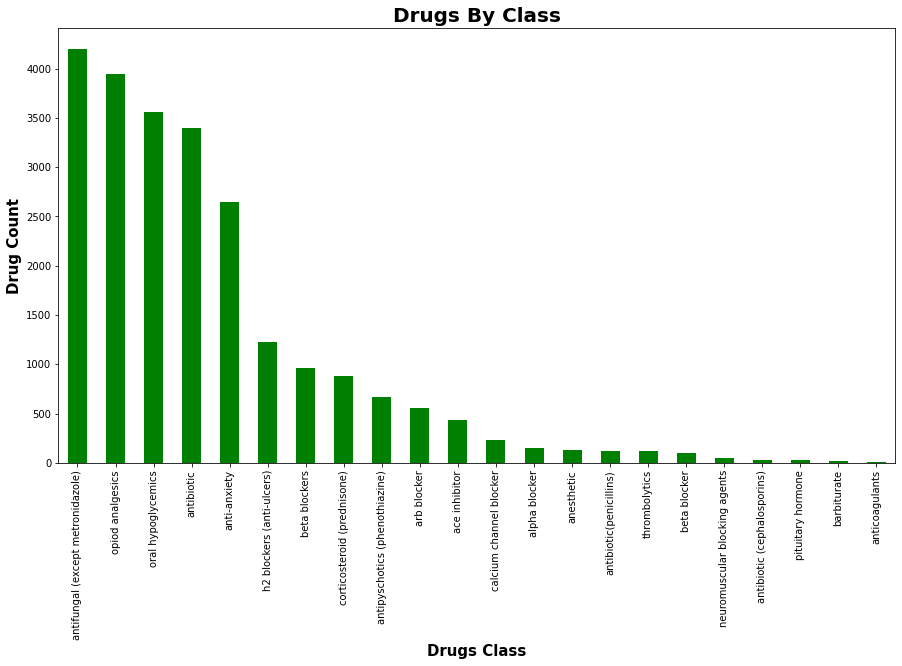

In [36]:
plt.figure(figsize=(15,8))
fig = df_class['drug_class'].value_counts().plot(kind='bar',color='green')
fig.set_title("Drugs By Class", {'fontsize': 20,'fontweight': 'bold'})
fig.set_xlabel("Drugs Class",{'fontsize': 15,'fontweight': 'bold'})
fig.set_ylabel("Drug Count", {'fontsize': 15,'fontweight': 'bold'})

### 6. Distribution of Drugs Per Drug class based on size

In [37]:
(df_class
 .groupby('drug_class')
 .size()
 .to_frame()
 .set_axis(['Count'],axis=1)
 .sort_values(by='Count',ascending=False)
)

,Count
drug_class,
antifungal (except metronidazole),4201
opiod analgesics,3945
oral hypoglycemics,3555
antibiotic,3401
anti-anxiety,2645
h2 blockers (anti-ulcers),1228
beta blockers,966
corticosteroid (prednisone),886
antipyschotics (phenothiazine),664


In [38]:
grouped_df  = (df_class
 .groupby('drug_class')
 .size()
 .to_frame()
 .set_axis(['Count'],axis=1)
 .sort_values(by='Count',ascending=False)
)

Text(0.5, 1.0, 'Drugs By Class')

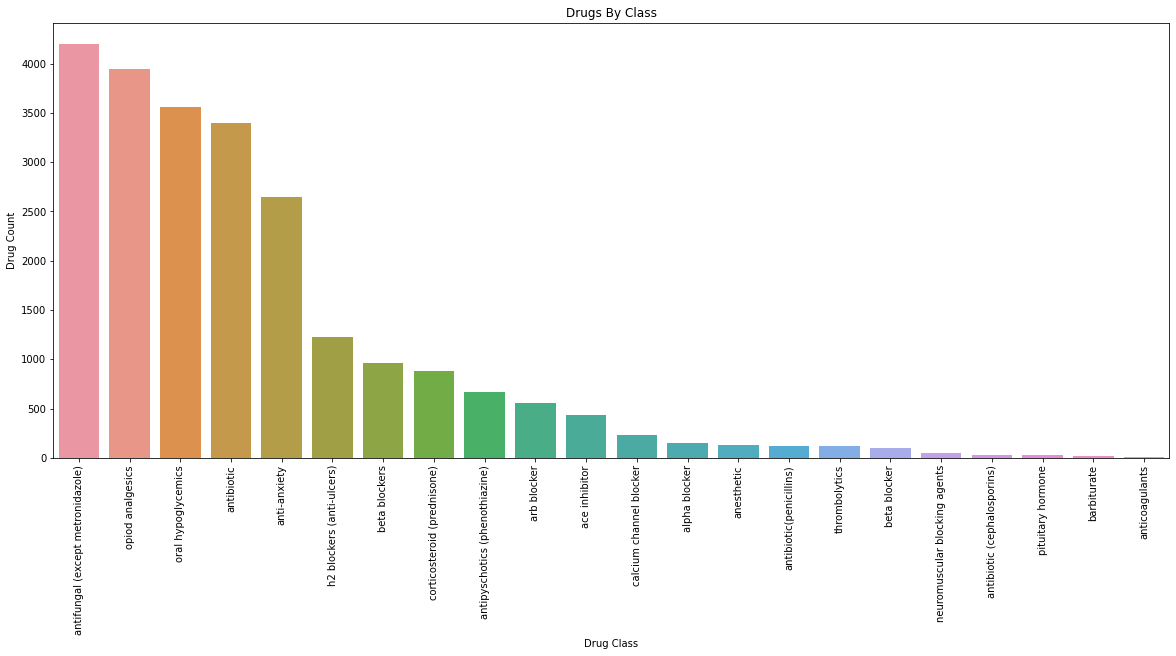

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(x=grouped_df.index,y='Count',data=grouped_df)
plt.xticks(rotation=90);
plt.xlabel("Drug Class")
plt.ylabel("Drug Count")
plt.title("Drugs By Class")

### 7.Question on Conditions
+ How many conditions are there?
+ Which conditions are the most common?
+ Distribution of conditions and rating

In [44]:
len(df['condition']
 .value_counts()
 .to_list()
)

884

In [46]:
(df['condition']
 .value_counts()
 .nlargest(10)
)

Birth Control      28788
Depression          9069
Pain                6145
Anxiety             5904
Acne                5588
Bipolar Disorde     4224
Insomnia            3673
Weight Loss         3609
Obesity             3568
ADHD                3383
Name: condition, dtype: int64

<AxesSubplot:>

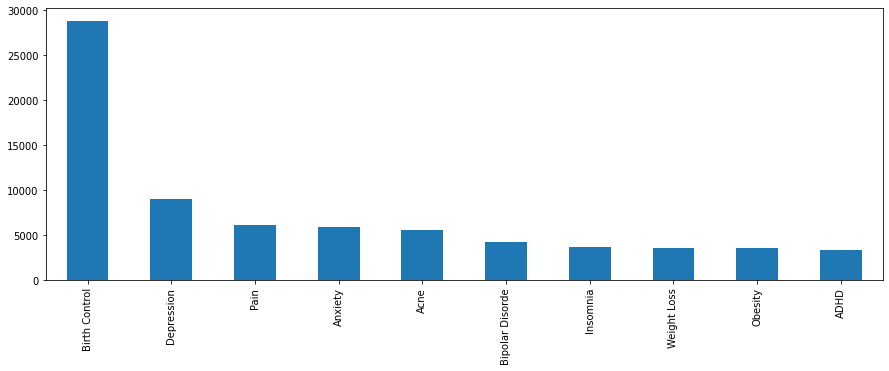

In [48]:
plt.figure(figsize=(15,5))
(df['condition']
 .value_counts()
 .nlargest(10)
 .plot(kind='bar')
)

<AxesSubplot:>

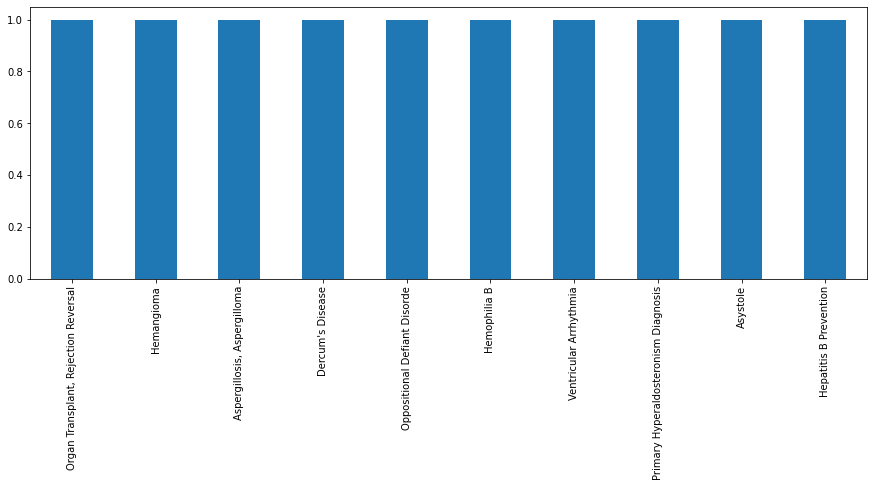

In [49]:
plt.figure(figsize=(15,5))
(df['condition']
 .value_counts()
 .nsmallest(10)
 .plot(kind='bar')
)

### 8. Distribution of Drugs by Condition

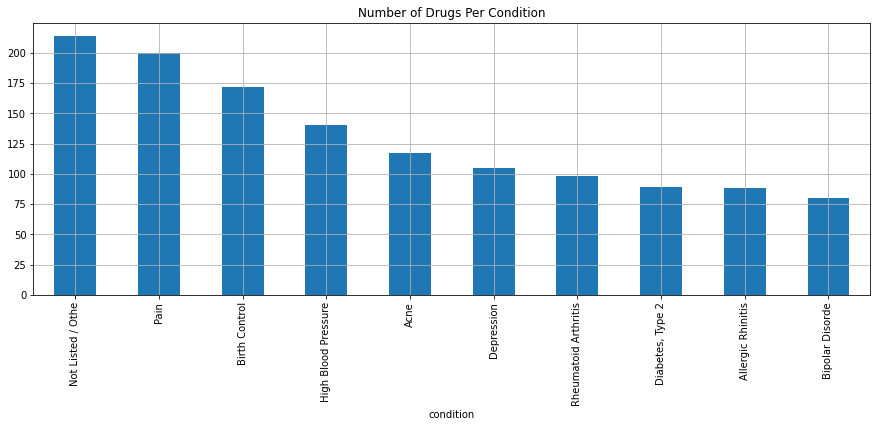

In [57]:
plt.figure(figsize=(15,5))
(df
 .groupby('condition')['drugName']
 .nunique()
 .nlargest(10)
 .plot(kind='bar')
)
plt.title("Number of Drugs Per Condition")
plt.grid()
plt.show()

### 9. Questions on Rating
+ Number of Drugs per rating
+ Distribution of rating
+ Average Rating Per Count

In [58]:
(df['rating']
.value_counts())

10    50989
9     27531
1     21619
8     18890
7      9456
5      8013
2      6931
3      6513
6      6343
4      5012
Name: rating, dtype: int64

<AxesSubplot:>

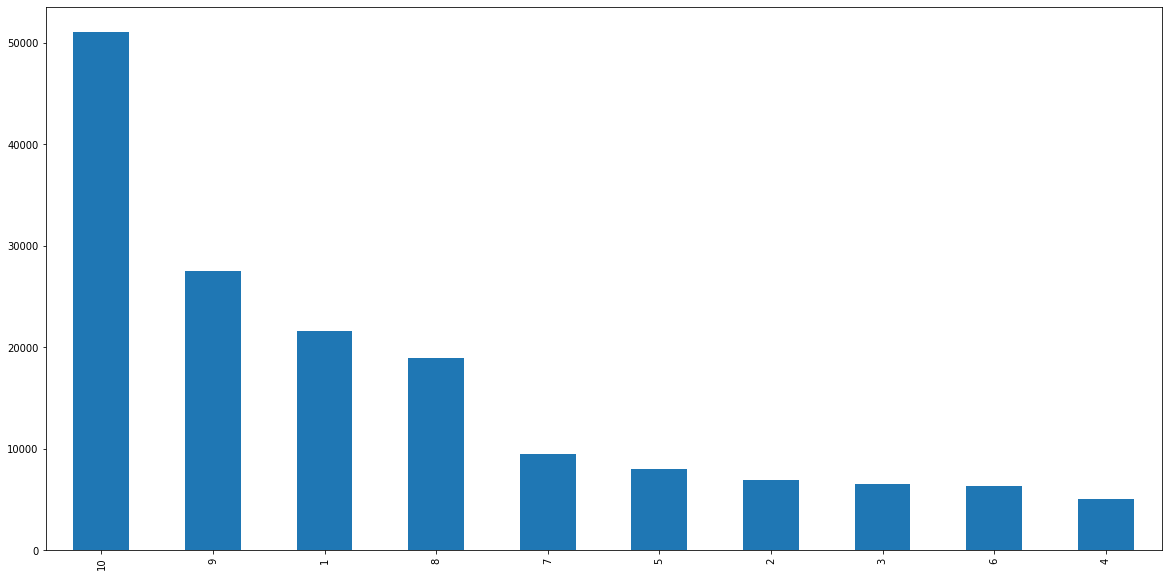

In [61]:
plt.figure(figsize=(20,10))
(df['rating']
.value_counts()
.plot(kind='bar')
)

### 10. Averge Ratings for each Drug

In [73]:
%%timeit
(df['rating']
 .groupby(df['drugName'])
 .mean()
)

5.09 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [74]:
%%timeit
(df
 .groupby('drugName')['rating']
 .mean()
)

4.99 ms ± 216 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


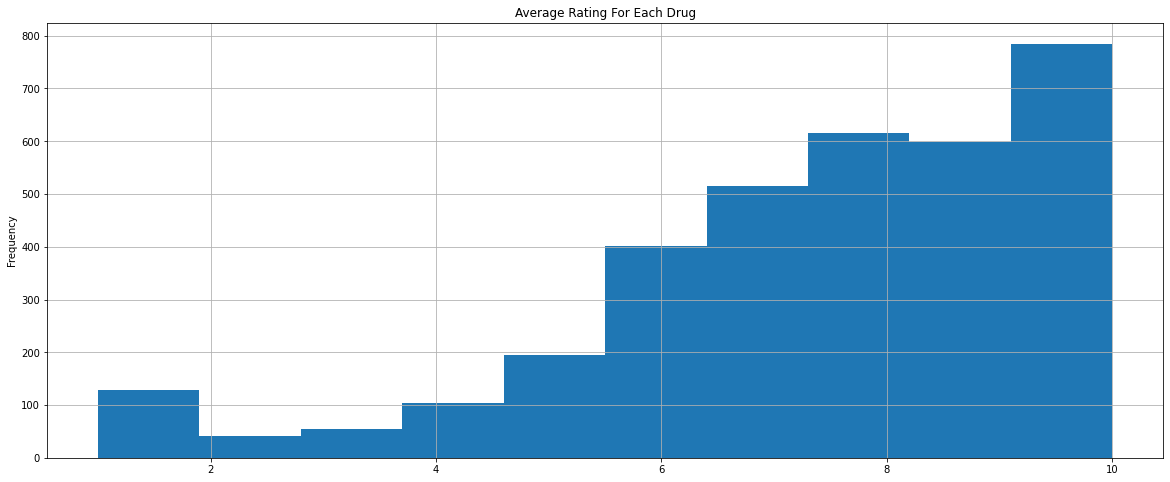

In [77]:
plt.figure(figsize=(20,8))
(df
 .groupby('drugName')['rating']
 .mean()
 .plot(kind='hist')
)
plt.title('Average Rating For Each Drug')
plt.grid()

### Question on Review
+ How genuine is the review? (Using sentiment analysis)
+ How many reviews are positive,negative,neutral?
+ Correlation between rating and review and users who found the review useful
+ Distribution of rating
+ Amount of review made per year and per month
+ Which condition has the most review on drugs
+ Can you predict the rating using the review?